In [1]:
import sys

# append root project directory so packages will be available
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import src.utility.letter_operations as lo
import cv2
from src.utility import dataset_loader
import re
from pathlib import Path

FILE_PATH = Path().parent.as_posix() + "/"

# np.random.seed(1)

plt.style.use('grayscale')


# sheet parameters
columns = 80
rows = 114
cell = 32
max_chars = columns * rows

noise = 127

# Load letters images and mappings for KUZUSHIJI-49 and EMNIST-BYMERGE

In [3]:
kuzushiji_letters, kuzushiji_mapping = dataset_loader.load_kuzushiji()
del kuzushiji_mapping[48] # deleting iterative character
print(len(kuzushiji_letters))

49


In [4]:
for i in kuzushiji_letters:
    print(len(kuzushiji_letters[i]))

6000
6000
6000
777
6000
6000
6000
6000
4714
6000
6000
6000
6000
4165
3867
6000
2565
6000
6000
6000
6000
6000
2063
2451
6000
6000
5132
6000
6000
1993
6000
3060
1718
3394
6000
6000
1598
6000
6000
6000
6000
6000
2139
2397
417
392
6000
6000
3523


In [5]:
emnist_letters, emnist_mapping = dataset_loader.load_emnist_bymerge()
emnist_mapping_inverted = {v: k for k, v in emnist_mapping.items()}
print(len(emnist_letters))

47


In [6]:
for i in emnist_letters:
    print(len(emnist_letters[i]))

34618
38304
34307
35285
33656
31280
34150
36020
33924
33882
6411
3874
12963
4606
4925
9098
2534
3097
14733
5689
4998
20381
11612
8237
27664
10748
2603
5047
23509
9766
15388
7588
7403
5598
7092
5416
10009
5080
10152
24657
2535
3693
8682
11444
2966
14060
18248


# Load text data

In [7]:
with open('../../data/winnie_the_pooh/pg67098.txt', 'r') as file:
    data = file.read()

In [8]:
list(data)

['ď',
 '»',
 'ż',
 'T',
 'h',
 'e',
 ' ',
 'P',
 'r',
 'o',
 'j',
 'e',
 'c',
 't',
 ' ',
 'G',
 'u',
 't',
 'e',
 'n',
 'b',
 'e',
 'r',
 'g',
 ' ',
 'e',
 'B',
 'o',
 'o',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'W',
 'i',
 'n',
 'n',
 'i',
 'e',
 '-',
 't',
 'h',
 'e',
 '-',
 'P',
 'o',
 'o',
 'h',
 ',',
 ' ',
 'b',
 'y',
 ' ',
 'A',
 '.',
 ' ',
 'A',
 '.',
 ' ',
 'M',
 'i',
 'l',
 'n',
 'e',
 '\n',
 '\n',
 'T',
 'h',
 'i',
 's',
 ' ',
 'e',
 'B',
 'o',
 'o',
 'k',
 ' ',
 'i',
 's',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'u',
 's',
 'e',
 ' ',
 'o',
 'f',
 ' ',
 'a',
 'n',
 'y',
 'o',
 'n',
 'e',
 ' ',
 'a',
 'n',
 'y',
 'w',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'U',
 'n',
 'i',
 't',
 'e',
 'd',
 ' ',
 'S',
 't',
 'a',
 't',
 'e',
 's',
 ' ',
 'a',
 'n',
 'd',
 '\n',
 'm',
 'o',
 's',
 't',
 ' ',
 'o',
 't',
 'h',
 'e',
 'r',
 ' ',
 'p',
 'a',
 'r',
 't',
 's',
 ' ',
 'o',
 'f',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 

### Process text to only contain letters, numbers and whitespaces

also currently we start from chapter 1 (might change in future)

In [9]:
pattern = re.compile('^[a-zA-Z0-9 ]*$')

result = "".join([s for s in data if pattern.match(s)])
result = list(result)

### Display text to verify processing results

In [10]:
result

['T',
 'h',
 'e',
 ' ',
 'P',
 'r',
 'o',
 'j',
 'e',
 'c',
 't',
 ' ',
 'G',
 'u',
 't',
 'e',
 'n',
 'b',
 'e',
 'r',
 'g',
 ' ',
 'e',
 'B',
 'o',
 'o',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'W',
 'i',
 'n',
 'n',
 'i',
 'e',
 't',
 'h',
 'e',
 'P',
 'o',
 'o',
 'h',
 ' ',
 'b',
 'y',
 ' ',
 'A',
 ' ',
 'A',
 ' ',
 'M',
 'i',
 'l',
 'n',
 'e',
 '\n',
 '\n',
 'T',
 'h',
 'i',
 's',
 ' ',
 'e',
 'B',
 'o',
 'o',
 'k',
 ' ',
 'i',
 's',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'u',
 's',
 'e',
 ' ',
 'o',
 'f',
 ' ',
 'a',
 'n',
 'y',
 'o',
 'n',
 'e',
 ' ',
 'a',
 'n',
 'y',
 'w',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'U',
 'n',
 'i',
 't',
 'e',
 'd',
 ' ',
 'S',
 't',
 'a',
 't',
 'e',
 's',
 ' ',
 'a',
 'n',
 'd',
 '\n',
 'm',
 'o',
 's',
 't',
 ' ',
 'o',
 't',
 'h',
 'e',
 'r',
 ' ',
 'p',
 'a',
 'r',
 't',
 's',
 ' ',
 'o',
 'f',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'a',
 't',
 ' ',
 'n',
 'o',
 ' ',
 'c',
 

##### Verify if every character is letter, number or space

In [11]:
assert all(character.isalnum() or character.isspace() for character in result)

# Generate sheets with characters

### Generate empty sheet

In [12]:
empty_sheet = np.zeros(shape=(rows * cell, columns * cell))

### Verify sheet visually

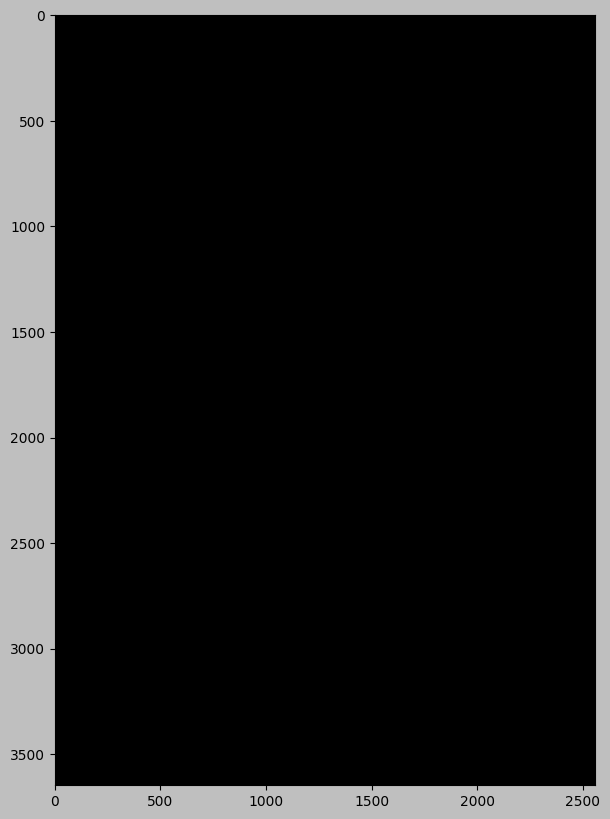

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(empty_sheet)

##### Map emnist symbols to kuzushiji randomly

In [14]:
temporary_list = list(kuzushiji_mapping.keys())
np.random.shuffle(temporary_list)

emnist_to_kuzushiji_mapping = dict()
for element in range(len(emnist_mapping.keys())):
    emnist_to_kuzushiji_mapping[emnist_mapping[element]] = temporary_list[element]

### Some lowercase letters are missing from dataset, we fix this by mapping missing letters to uppercase ones

In [15]:
missing_letters = ['u','i','j','k','l','m','o','p','c','y','v','s','w','x','z']

for ml in missing_letters:
    emnist_mapping_inverted[ml] = emnist_mapping_inverted[ml.upper()]
    emnist_to_kuzushiji_mapping[ml] = emnist_to_kuzushiji_mapping[ml.upper()]

#### Show generated mapping of emnist to kuzushiji for later reference

In [16]:
for element in range(len(emnist_mapping.keys())):
    print(f'{emnist_mapping[element]} --> {kuzushiji_mapping[temporary_list[element]]}')

0 --> け
1 --> ろ
2 --> せ
3 --> ち
4 --> む
5 --> か
6 --> は
7 --> れ
8 --> ふ
9 --> に
A --> な
B --> ま
C --> め
D --> す
E --> を
F --> き
G --> へ
H --> ほ
I --> わ
J --> の
K --> さ
L --> あ
M --> く
N --> ゐ
O --> よ
P --> ゆ
Q --> も
R --> つ
S --> み
T --> ら
U --> と
V --> え
W --> お
X --> ひ
Y --> ん
Z --> い
a --> り
b --> う
d --> ゑ
e --> る
f --> そ
g --> て
h --> ぬ
n --> こ
q --> し
r --> た
t --> や


#### Generate characters sheets, add noise, threshold

In [22]:
trials = [1, 2, 3, 4, 5]

for trial in range(len(trials)):
    l_idx = 0

    sheets_kuzushiji = list()

    while l_idx < len(result):
        kuzushiji_sheet = empty_sheet.copy()
        for i in range(0, kuzushiji_sheet.shape[0], 32):
            if l_idx >= len(result):
                break
            for j in range(0, kuzushiji_sheet.shape[1], 32):
                if l_idx >= len(result):
                    break
                if result[l_idx] == '\n':
                    l_idx += 1
                    break
                elif result[l_idx] == ' ':
                    kuzushiji_sheet[i:i + 32, j:j + 32] = (np.zeros(shape=(32, 32)))
                else:
                    random_choice = np.random.randint(trials[trial]) # np.random.choice(kuzushiji_letters[emnist_to_kuzushiji_mapping[result[l_idx]]].shape[0], 1)[0]
                    while random_choice >= kuzushiji_letters[emnist_to_kuzushiji_mapping[result[l_idx]]].shape[0]:
                        random_choice = np.random.randint(trials[trial])
                    plain_character = kuzushiji_letters[emnist_to_kuzushiji_mapping[result[l_idx]]][random_choice]
                    if np.random.random() < 0.3:
                        plain_character = lo.stretch_cv2(plain_character, np.round(np.random.uniform(0.85, 1.15), 2), np.random.randint(0, 2))
                    if np.random.random() < 0.3:
                        plain_character = lo.rotate_cv2(plain_character, np.round(np.random.uniform(-30, 30)))
                    kuzushiji_sheet[i:i + 32, j:j + 32] = plain_character
                l_idx += 1
        kuzushiji_sheet = lo.thresholding(kuzushiji_sheet, 127)
        kuzushiji_sheet = lo.noise(kuzushiji_sheet, noise)
        kuzushiji_sheet = lo.invert_pixels(kuzushiji_sheet)
        sheets_kuzushiji.append(kuzushiji_sheet)

    path = FILE_PATH + '../../data/generated/kuzushiji/'

    for idx in range(len(sheets_kuzushiji)):
        cv2.imwrite(path + '/trial_' + str(trial) + "/kuzushiji_" + str(idx) + ".png", sheets_kuzushiji[idx])

In [23]:
trials = [1, 2, 3, 4, 5]

for trial in range(len(trials)):

    l_idx = 0

    sheets_emnist = list()

    while l_idx < len(result):
        emnist_sheet = empty_sheet.copy()
        for i in range(0, emnist_sheet.shape[0], 32):
            if l_idx >= len(result):
                break
            for j in range(0, emnist_sheet.shape[1], 32):
                if l_idx >= len(result):
                    break
                if result[l_idx] == '\n':
                    l_idx += 1
                    break
                elif result[l_idx] == ' ':
                    emnist_sheet[i:i + 32, j:j + 32] = (np.zeros(shape=(32, 32)))
                else:
                    random_choice = np.random.randint(trials[trial]) # np.random.choice(emnist_letters[emnist_mapping_inverted[result[l_idx]]].shape[0], 1)[0]
                    while random_choice >= emnist_letters[emnist_mapping_inverted[result[l_idx]]].shape[0]:
                        random_choice = np.random.randint(trials[trial])
                    plain_character = emnist_letters[emnist_mapping_inverted[result[l_idx]]][random_choice]
                    if np.random.random() < 0.3:
                        plain_character = lo.stretch_cv2(plain_character, np.round(np.random.uniform(0.85, 1.15), 2), np.random.randint(0, 2))
                    if np.random.random() < 0.3:
                        plain_character = lo.rotate_cv2(plain_character, np.round(np.random.uniform(-30, 30)))
                    emnist_sheet[i:i + 32, j:j + 32] = plain_character
                l_idx += 1

        emnist_sheet = lo.thresholding(emnist_sheet, 127)
        emnist_sheet = lo.noise(emnist_sheet, noise)
        emnist_sheet = lo.invert_pixels(emnist_sheet)
        sheets_emnist.append(emnist_sheet)

    path = FILE_PATH + '../../data/generated/emnist/'

    for idx in range(len(sheets_emnist)):
        cv2.imwrite(path + '/trial_' + str(trial) + "/emnist_" + str(idx) + ".png", sheets_emnist[idx])